## Import libraries and load data
This cell loads a dataset and displays its contents

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

file_path = "/home/ducanor/arena_ws/src/forks/arena-evaluation/02_evaluation/data_22-08-30_14-38-11.csv" # specify file path to data for plotting
assert os.path.exists(file_path), "File path invalid: {0}".format(file_path)
assert file_path.split(".")[-1]=="csv", "Specified file is not a .csv file: {0}".format(file_path)
data = pd.read_csv(file_path, index_col = 0)

print("Columns of the dataframe:")
print(list(data.columns))

print("The following shows which planners were evaluated on which robot, map, and scenario:")
print(np.unique(["---".join(row) for index, row in data[["planner","model","map","scenario"]].iterrows()]))

# from IPython.display import display
# display(data) # display pd dataframe

Columns of the dataframe:
['episode', 'time', 'collision', 'min_clearing_distance', 'normalized_curvature', 'roughness', 'jerk', 'path_length', 'success', 'done_reason', 'angle_over_length', 'planner', 'model', 'map', 'scenario', 'paths_traveled']
The following shows which planners were evaluated on which robot, map, and scenario:
['dwa---burger---map1---obstacle_map1_obs05'
 'dwa---burger---map1---obstacle_map1_obs10'
 'teb---burger---map1---obstacle_map1_obs05'
 'teb---burger---map1---obstacle_map1_obs10']


## Barplots to compare average planner performance
Barplots can be used to directly compare the average planner performance across the scenarios

Text(0.5, 0.98, 'Time traveled')

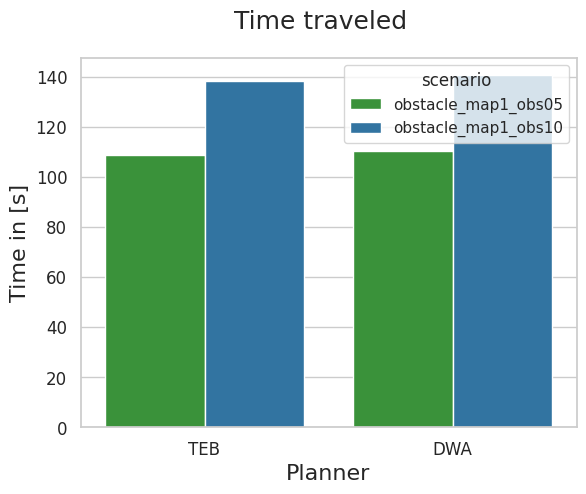

In [2]:
sns.set_theme(style="whitegrid")
fig,ax = plt.subplots()

### filter to get subset of data
subset = data
# subset = subset[subset["planner"]=="teb"]
# subset = subset[subset["model"]=="burger"]
# subset = subset[subset["map"]=="map1"]
# subset = subset[subset["scenario"]=="obstacle_map1_obs05"]

### color scheme
color_scheme = { # if hue is used, dictionary has to be defined for hue values
    "obstacle_map1_obs05":"tab:green",
    "obstacle_map1_obs10":"tab:blue",
    "dwa": "tab:orange",
    "teb": "tab:red"
}

### planner labels
planner_labels = {
    "dwa":"DWA",
    "teb":"TEB"
}

### drawing bar plots, please refer to https://seaborn.pydata.org/generated/seaborn.barplot.html for further information
ax = sns.barplot(x="planner", y="time", hue="scenario", palette=color_scheme, ci=None, data=subset) # use ci="sd" to plot standard deviation as error bars, ci=None to omit
ax.set_ylabel("Time in [s]", fontsize=16)
ax.set_xlabel("Planner", fontsize=16)
ax.set_xticklabels([planner_labels[x.get_text()] for x in ax.get_xticklabels()], fontsize=12) 
ax.tick_params(axis='both', which='major', labelsize=12)
plt.suptitle("Time traveled", fontsize=18)
# plt.title("", fontsize=12)

## Lineplots to compare planner performance across episodes
Lineplots show a more detailed view of the planner performance across the episodes

Text(0.5, 1.0, 'Map: map1 Scenario: obstacle_map1_obs05')

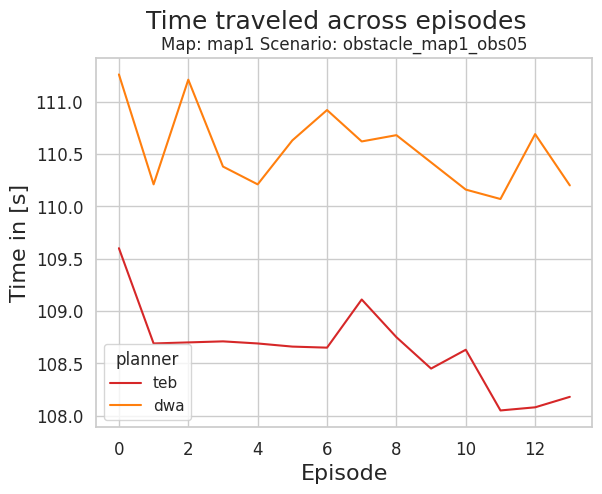

In [34]:
sns.set_theme(style="whitegrid")
fig,ax = plt.subplots()

### filter to get subset of data
subset = data
# subset = subset[subset["planner"]=="teb"]
subset = subset[subset["model"]=="burger"]
subset = subset[subset["map"]=="map1"]
subset = subset[subset["scenario"]=="obstacle_map1_obs05"]

### color scheme
color_scheme = { # if hue is used, dictionary has to be defined for hue values
    "obstacle_map1_obs05":"tab:green",
    "obstacle_map1_obs10":"tab:blue",
    "dwa": "tab:orange",
    "teb": "tab:red"
}

### planner labels
planner_labels = {
    "dwa":"DWA",
    "teb":"TEB"
}

### drawing line plots, please refer to https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot for further information
ax = sns.lineplot(x="episode", y="time", hue="planner", palette=color_scheme, ci=None, data=subset) # use ci="sd" to plot standard deviation as error bars, ci=None to omit
ax.set_ylabel("Time in [s]", fontsize=16)
ax.set_xlabel("Episode", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.suptitle("Time traveled across episodes", fontsize=18)
plt.title("Map: map1 Scenario: obstacle_map1_obs05", fontsize=12)

## Piecharts to compare success and failure rates
Piecharts show the fractions of successful and unsuccessful episodes as well as the type of failures

Text(0.5, 0.98, 'Success and Failure Rates')

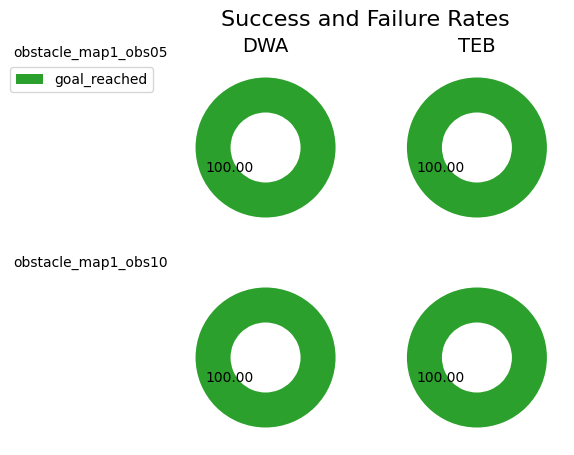

In [79]:
### filter to get subset of data
subset = data
# subset = subset[subset["planner"]=="teb"]
subset = subset[subset["model"]=="burger"]
subset = subset[subset["map"]=="map1"]
# subset = subset[subset["scenario"]=="obstacle_map1_obs05"]

grouped_subset = subset.groupby(["scenario","planner","done_reason"]).size()

scenarios = np.unique(subset.scenario)
planners = np.unique(subset.planner)
nrows = len(scenarios)
ncols = len(planners)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(5,5))

### color list for done reasons
colors = [
    "tab:green",
    "tab:blue",
    "tab:red"
]

### planner labels
planner_labels = {
    "dwa":"DWA",
    "teb":"TEB"
}


### draw multiple pie plots (donut plots with wedgeprops), for further information https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html
for row,scene in enumerate(scenarios):
    for col,planner in enumerate(planners):
        axes[row,col].pie(grouped_subset.loc[(scene,planner),],
            autopct='%.2f', 
            wedgeprops=dict(width=.5), # donut property, omit for regular pie chart
            colors=colors,
            startangle=30)
        if row==0:
            axes[row,col].set_title(planner_labels[planner], fontsize=14)
        if col==0:
            axes[row,col].set_ylabel(scene, fontsize=10, loc="top", rotation="horizontal")
        if row==0 and col==0: # display legend only in axes[0,0]
            axes[row,col].legend(list(grouped_subset.loc[(scene,planner),].index), 
                bbox_to_anchor=(-1,1), # legend position
                loc="upper left",
                ncol=1,
                fancybox=True)
fig.suptitle('Success and Failure Rates', size=16)